# Explore here

Paso 1: Carga del conjunto de datos

In [364]:
import pandas as pd
import timeit
global_start_time = timeit.default_timer()

# your code here

total_data = pd.read_csv("/workspace/diabetes-tree-ml/data/raw/diabetes.csv")
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [365]:
#Extraer informacion de las variables

total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [366]:
#Eliminar duplicados

total_data = total_data.drop_duplicates()
total_data.shape

(768, 9)

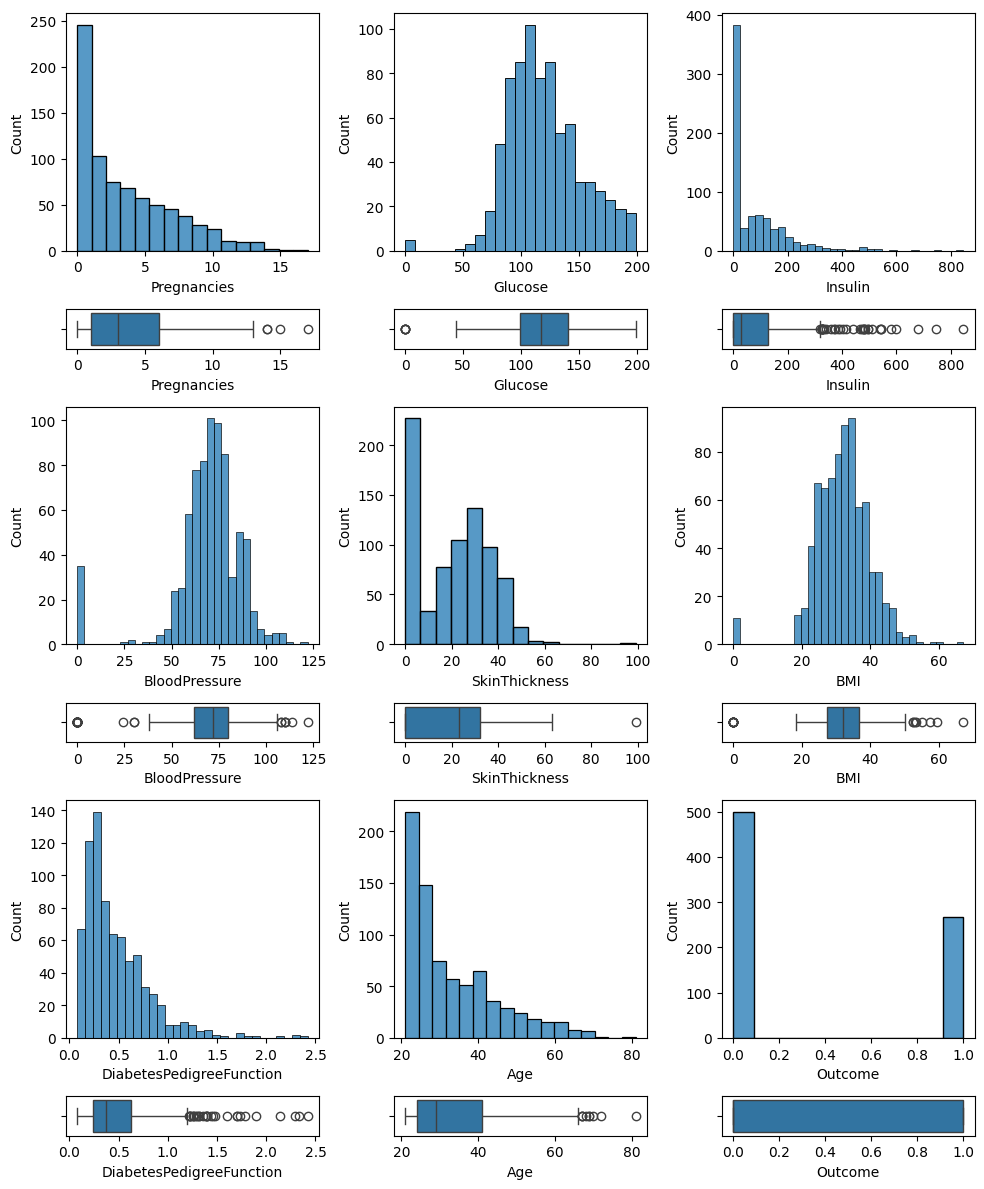

In [367]:
import matplotlib.pyplot as plt 
import seaborn as sns

#Analisis de variables numericas

fig, axis = plt.subplots(6, 3, figsize = (10, 12), gridspec_kw = {"height_ratios": [6, 1, 6, 1,6,1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "Pregnancies")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "Pregnancies")

sns.histplot(ax = axis[0, 1], data = total_data, x = "Glucose")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "Glucose")

sns.histplot(ax = axis[2, 0], data = total_data, x = "BloodPressure")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "BloodPressure")

sns.histplot(ax = axis[2, 1], data = total_data, x = "SkinThickness")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "SkinThickness")

sns.histplot(ax = axis[0, 2], data = total_data, x = "Insulin")
sns.boxplot(ax = axis[1, 2], data = total_data, x = "Insulin")

sns.histplot(ax = axis[2, 2], data = total_data, x = "BMI")
sns.boxplot(ax = axis[3, 2], data = total_data, x = "BMI")

sns.histplot(ax = axis[4, 0], data = total_data, x = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[5, 0], data = total_data, x = "DiabetesPedigreeFunction")

sns.histplot(ax = axis[4, 1], data = total_data, x = "Age")
sns.boxplot(ax = axis[5, 1], data = total_data, x = "Age")

sns.histplot(ax = axis[4, 2], data = total_data, x = "Outcome")
sns.boxplot(ax = axis[5, 2], data = total_data, x = "Outcome")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

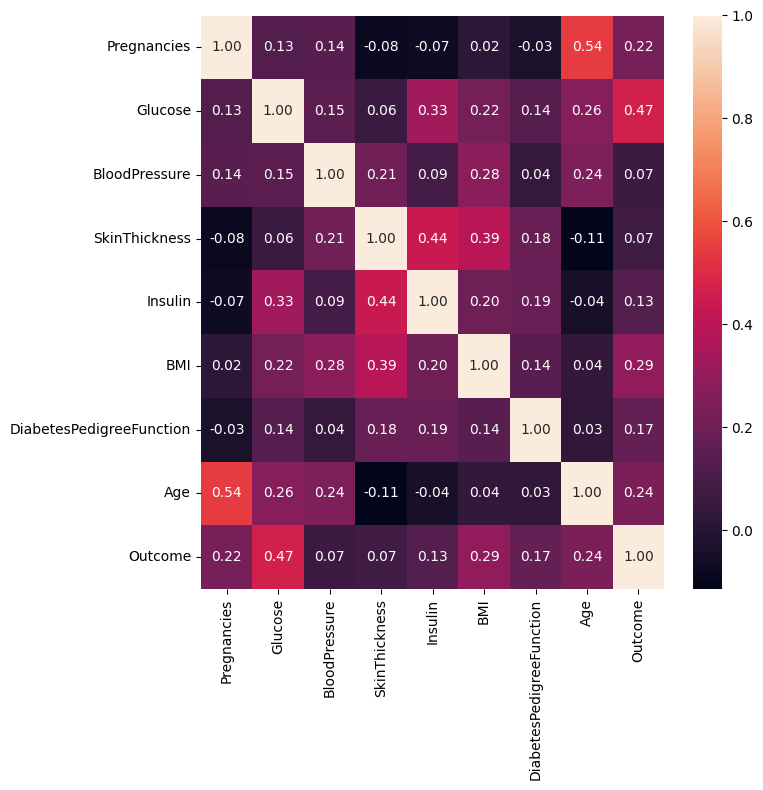

In [368]:
fig, axes = plt.subplots(figsize=(8, 8))

sns.heatmap(total_data[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction","Age","Outcome"]].corr(), annot = True, fmt = ".2f")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

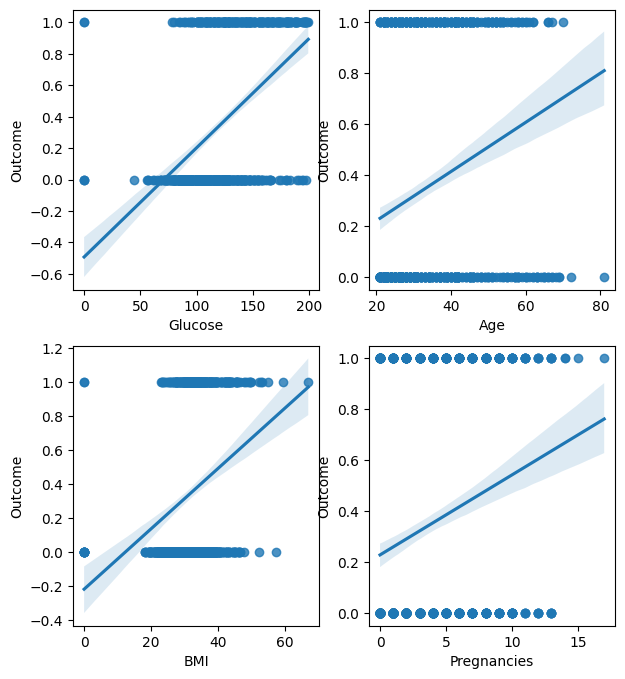

In [369]:
#Analizar correlaciones

fig, axis = plt.subplots(2,2, figsize = (7, 8))

sns.regplot(ax = axis[0,0], data = total_data, x = "Glucose", y = "Outcome")
sns.regplot(ax = axis[1,0], data = total_data, x = "BMI", y = "Outcome")
sns.regplot(ax = axis[0,1], data = total_data, x = "Age", y = "Outcome")
sns.regplot(ax = axis[1,1], data = total_data, x = "Pregnancies", y = "Outcome")


plt.show()

In [370]:
#Visualizar datos

total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Comprobar Outliers

In [371]:
total_data[total_data["Glucose"] < 1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [372]:
Glucose = total_data["Glucose"].describe()
Glucose

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

In [373]:
gluc_iqr = Glucose["75%"] - Glucose["25%"]
upper_limit = Glucose["75%"] + 1.5 * gluc_iqr
lower_limit = Glucose["25%"] - 1.5 * gluc_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(gluc_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 202.12 y 37.12, con un rango intercuartílico de 41.25


In [374]:
total_data = total_data[total_data["Glucose"] > 37.12]

In [375]:
bp_stats = total_data["BloodPressure"].describe()
bp_stats

count    763.000000
mean      69.115334
std       19.399240
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

In [376]:
bp_iqr = bp_stats["75%"] - bp_stats["25%"]
upper_limit = bp_stats["75%"] + 1.5 * bp_iqr
lower_limit = bp_stats["25%"] - 1.5 * bp_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(gluc_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 107.0 y 35.0, con un rango intercuartílico de 41.25


In [377]:
counter = total_data[total_data["BloodPressure"] < 35]
counter.shape

(38, 9)

In [378]:
total_data = total_data[total_data["BloodPressure"] > 35]

In [379]:
bmi_stats = total_data["BMI"].describe()
bmi_stats

count    725.000000
mean      32.248414
std        7.230106
min        0.000000
25%       27.400000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [380]:
bmi_iqr = bmi_stats["75%"] - bmi_stats["25%"]
upper_limit = bmi_stats["75%"] + 1.5 * bmi_iqr
lower_limit = bmi_stats["25%"] - 1.5 * bmi_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(bmi_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 50.4 y 13.6, con un rango intercuartílico de 9.2


In [381]:
total_data = total_data[total_data["BMI"] > 14]

Análisis de valores faltantes

In [382]:
total_data.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [383]:
from sklearn.model_selection import train_test_split

num_variables = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction","Age"]

X = total_data.drop("Outcome", axis = 1)[num_variables]
y = total_data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
481,0,123,88,37,0,35.2,0.197,29
383,1,90,62,18,59,25.1,1.268,25
406,4,115,72,0,0,28.9,0.376,46
156,2,99,52,15,94,24.6,0.637,21
227,3,162,52,38,0,37.2,0.652,24


In [384]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 7)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,123.0,88.0,0.0,35.2,0.197,29.0
1,1.0,90.0,62.0,59.0,25.1,1.268,25.0
2,4.0,115.0,72.0,0.0,28.9,0.376,46.0
3,2.0,99.0,52.0,94.0,24.6,0.637,21.0
4,3.0,162.0,52.0,0.0,37.2,0.652,24.0


In [385]:
X_test_sel.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,104.0,64.0,116.0,27.8,0.454,23.0
1,4.0,110.0,76.0,100.0,28.4,0.118,27.0
2,13.0,106.0,72.0,0.0,36.6,0.178,45.0
3,5.0,139.0,64.0,140.0,28.6,0.411,26.0
4,1.0,80.0,55.0,0.0,19.1,0.258,21.0


In [386]:
X_train_sel["Outcome"] = list(y_train)
X_test_sel["Outcome"] = list(y_test)

In [387]:
X_train_sel.to_csv("/workspace/diabetes-tree-ml/data/processed/clean_train.csv", index=False)
X_test_sel.to_csv("/workspace/diabetes-tree-ml/data/processed/clean_test.csv", index=False)

Paso 3: Construye un modelo de árbol de decisión

In [388]:
train_data = pd.read_csv("/workspace/diabetes-tree-ml/data/processed/clean_train.csv")
test_data = pd.read_csv("/workspace/diabetes-tree-ml/data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.0,123.0,88.0,0.0,35.2,0.197,29.0,0
1,1.0,90.0,62.0,59.0,25.1,1.268,25.0,0
2,4.0,115.0,72.0,0.0,28.9,0.376,46.0,1
3,2.0,99.0,52.0,94.0,24.6,0.637,21.0,0
4,3.0,162.0,52.0,0.0,37.2,0.652,24.0,1


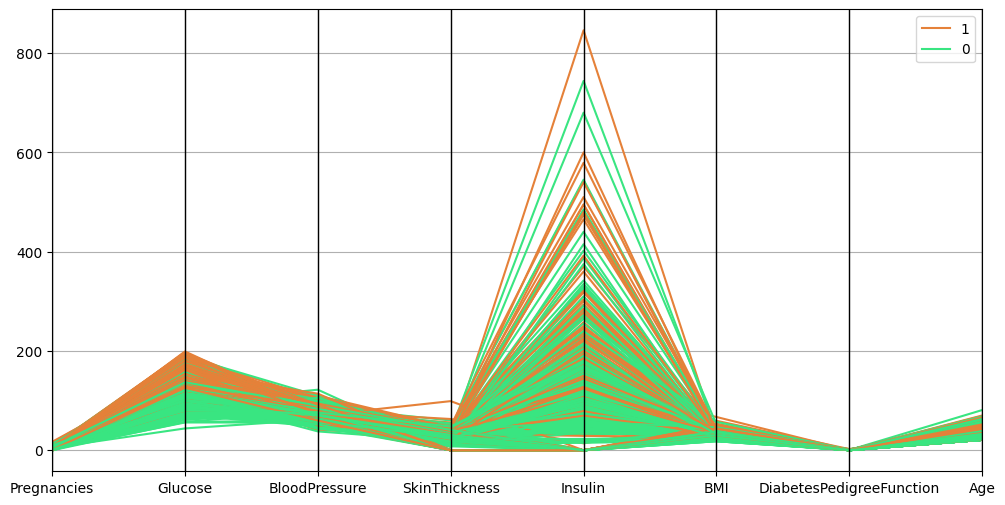

In [389]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))


pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

plt.show()

In [390]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

Inicializacion del modelo

In [391]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

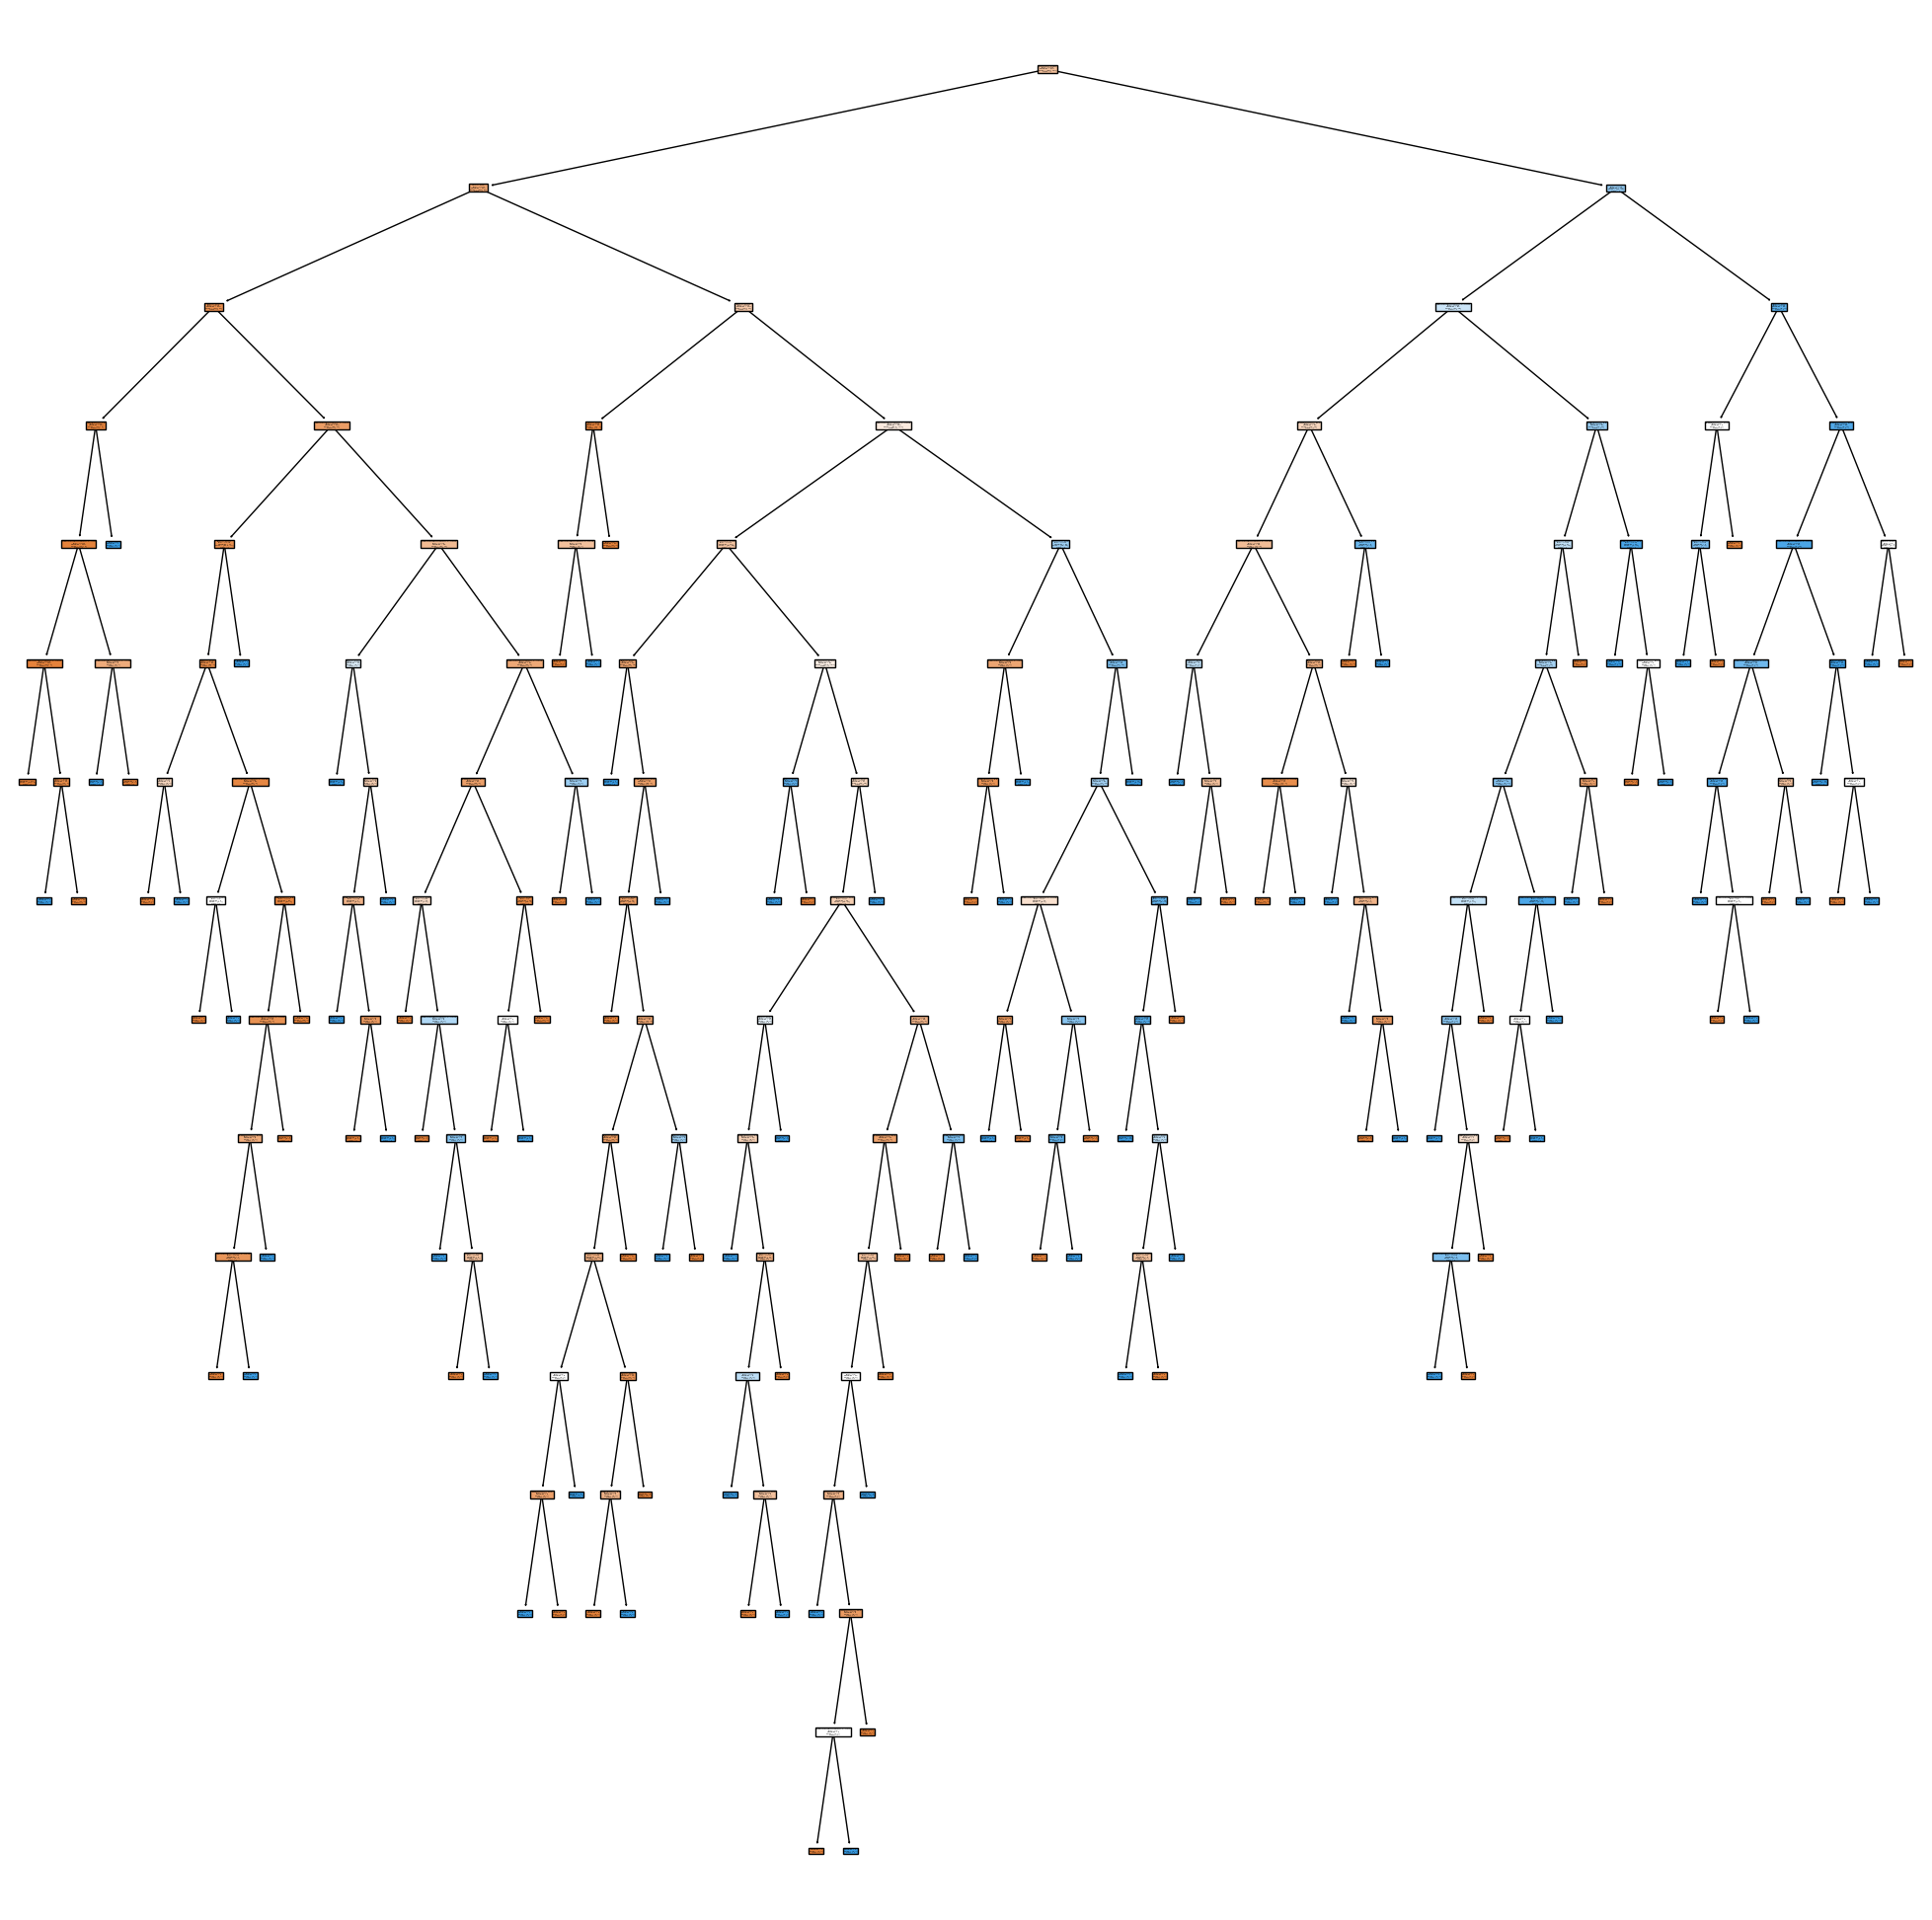

In [392]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,25))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [393]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [394]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7448275862068966

Optimizar hiperparametros

In [395]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

hyperparams = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10, 20, 50],
    "min_samples_leaf": [1, 2, 4, 6, 8, 10]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 6, 8, 10],
                         'min_samples_split': [2, 5, 10, 20, 50]},
             scoring='accuracy')

In [396]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 50}


In [397]:
model = DecisionTreeClassifier(criterion = "gini", max_depth = None, min_samples_leaf = 10, min_samples_split = 50, random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=50,
                       random_state=42)

In [398]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [399]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7310344827586207

Nota: El modelo da mejor valor de precisión con los valores Default, por lo que procederé a cargarlos de nuevo para el dump

In [400]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [401]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0])

In [402]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7448275862068966

In [404]:
from pickle import dump

dump(model, open("/workspace/diabetes-tree-ml/models/tree_classifier_default_values.sav", "wb"))